***Projet d'analyse de données de ventes***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Output/all_data.csv')

In [3]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
data.shape

(186850, 6)

In [5]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Nétoyage de la data

In [7]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
#Affichons les lignes qui ont au moins une valeur manquante

In [9]:
val_manquante=data[data.isnull().any(axis=1)]
val_manquante

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
val_manquante.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [11]:
#Supprimer toutes les lignes ave des valeurs manquantes


In [12]:
data.shape

(186850, 6)

In [13]:
data.dropna(inplace=True)

In [14]:
data.shape

(186305, 6)

In [15]:
data.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [16]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [17]:
data['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 186305, dtype: object

In [18]:
data[data['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
"1548".isdigit()

True

In [20]:
"otrd".isdigit()

False

In [21]:
data.loc[data['Order ID']=='Order ID',:]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [22]:
data.loc[data['Order ID']=='Order ID',:].index

Int64Index([   519,   1149,   1155,   2878,   2893,   3036,   3209,   3618,
              4138,   4645,
            ...
            183808, 184489, 184666, 184779, 185118, 185164, 185551, 186563,
            186632, 186738],
           dtype='int64', length=355)

In [23]:
df_clean=data.drop(data.loc[data['Order ID']=='Order ID',:].index)

In [24]:
df_clean.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


In [25]:
~df_clean['Order ID']

TypeError: ignored

In [26]:
~df_clean['Order ID'].str

TypeError: ignored

In [27]:
df_clean['Order ID'].str.isdigit()

0         True
2         True
3         True
4         True
5         True
          ... 
186845    True
186846    True
186847    True
186848    True
186849    True
Name: Order ID, Length: 185950, dtype: bool

In [28]:
~df_clean['Order ID'].str.isdigit()#~ c'est le not

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 185950, dtype: bool

In [29]:
df_clean.loc[~df_clean['Order ID'].str.isdigit(),:]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Changement des type des données

In [30]:
df_clean.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [31]:
df_clean.dtypes


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [32]:
df_clean['Quantity Ordered']=df_clean['Quantity Ordered'].astype(int)

In [33]:
df_clean['Price Each']=pd.to_numeric(df_clean['Price Each']) #en float

In [34]:
df_clean['Order Date']=pd.to_datetime(df_clean['Order Date'])

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


**Analyse Exploratoire**

## Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?

In [36]:
df_clean.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"


In [37]:
df_clean=df_clean.set_index('Order Date')

In [38]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001"
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001"


In [39]:
df_clean.sort_index(inplace=True)
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301"


In [40]:
df_clean['chiffre_daffaire']=df_clean['Quantity Ordered']*df_clean['Price Each']

In [41]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,chiffre_daffaire
Order Date,,,,,,
2019-02-02 12:59:00,161172,iPhone,1,700.00,"379 13th St, New York City, NY 10001",700.00
2019-03-18 00:56:00,165710,Flatscreen TV,1,300.00,"413 North St, Portland, OR 97035",300.00
2019-05-04 19:10:00,203408,USB-C Charging Cable,1,11.95,"489 Center St, Atlanta, GA 30301",11.95
2019-04-10 21:20:00,193196,27in FHD Monitor,1,149.99,"400 Lincoln St, Los Angeles, CA 90001",149.99
2019-01-24 10:46:00,148718,AA Batteries (4-pack),4,3.84,"427 9th St, San Francisco, CA 94016",15.36


In [43]:
df_clean['Month']=df_clean.index.month_name()

In [45]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().sort_values(ascending=False)

Month
December     4613443.34
October      3736726.88
April        3390670.24
November     3199603.20
May          3152606.75
March        2807100.38
July         2647775.76
June         2577802.26
August       2244467.88
February     2202022.42
September    2097560.13
January      1822256.73
Name: chiffre_daffaire, dtype: float64

In [46]:
order=["January","February","March","April","May","June","July","August","September","October","December"]

In [47]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order]

Month
January      1822256.73
February     2202022.42
March        2807100.38
April        3390670.24
May          3152606.75
June         2577802.26
July         2647775.76
August       2244467.88
September    2097560.13
October      3736726.88
December     4613443.34
Name: chiffre_daffaire, dtype: float64

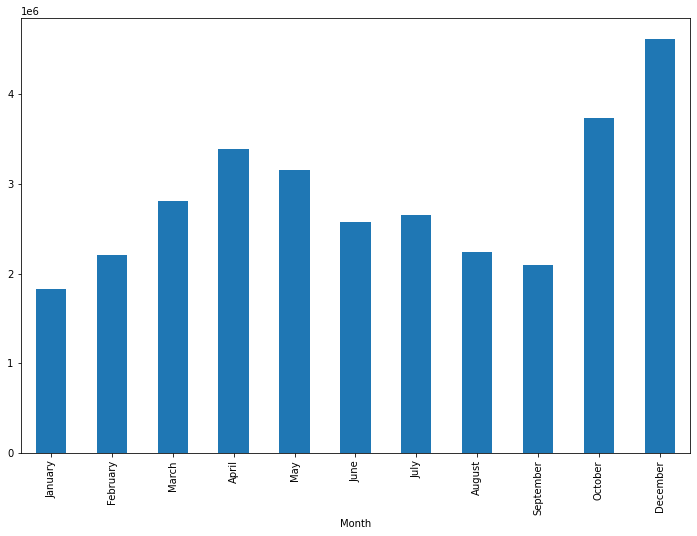

In [49]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order].plot.bar(figsize=(12,8))

In [51]:
print("Décembre en le meilleur moi de vente avec un chiffre d'affaire de ",
      df_clean.groupby('Month')["chiffre_daffaire"].sum().December)

Décembre en le meilleur moi de vente avec un chiffre d'affaire de  4613443.34


## Dans quelle ville a-t-on le plus vendu de produits?

In [52]:
df_clean['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [53]:
'9 Lake St, New York City, NY 10001'.split(',')

['9 Lake St', ' New York City', ' NY 10001']

In [54]:
'9 Lake St, New York City, NY 10001'.split(',')[1]

' New York City'

In [55]:
'9 Lake St, New York City, NY 10001'.split(',')[1].strip()

'New York City'

In [56]:
"  Python \n".strip()

'Python'

In [57]:
def get_ville(adresse):
  return adresse.split(',')[1].strip()

In [58]:
get_ville('760 Church St, San Francisco, CA 94016')

'San Francisco'

In [60]:
df_clean['ville']=df_clean['Purchase Address'].apply(get_ville)

In [61]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,chiffre_daffaire,Month,ville
Order Date,,,,,,,,
2019-03-09 14:05:00,165773,Wired Headphones,2,11.99,"948 Jefferson St, Austin, TX 73301",23.98,March,Austin
2019-04-14 16:17:00,183496,AA Batteries (4-pack),2,3.84,"103 Center St, Portland, OR 97035",7.68,April,Portland
2019-10-21 21:13:00,259692,Flatscreen TV,1,300.00,"384 11th St, Dallas, TX 75001",300.00,October,Dallas
2019-04-07 19:07:00,180909,ThinkPad Laptop,1,999.99,"846 8th St, Dallas, TX 75001",999.99,April,Dallas
2019-12-07 14:44:00,301726,Wired Headphones,1,11.99,"821 Walnut St, San Francisco, CA 94016",11.99,December,San Francisco


In [62]:
df_clean["ville"].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin'], dtype=object)

In [64]:
df_clean.groupby('ville')['chiffre_daffaire'].sum().sort_values(ascending=False)

ville
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: chiffre_daffaire, dtype: float64

In [65]:
vorder=['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin']

In [66]:
df_clean.groupby('ville')['chiffre_daffaire'].sum().loc[vorder]

ville
New York City    4664317.43
San Francisco    8262203.91
Dallas           2767975.40
Atlanta          2795498.58
Boston           3661642.01
Seattle          2747755.48
Los Angeles      5452570.80
Portland         2320490.61
Austin           1819581.75
Name: chiffre_daffaire, dtype: float64

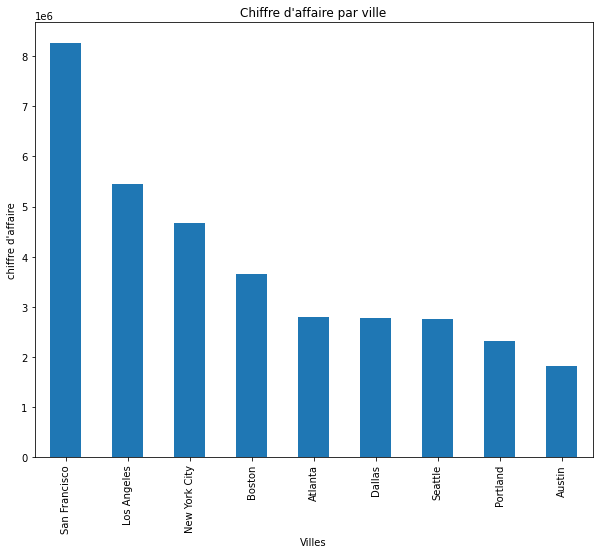

In [69]:
df_clean.groupby('ville')['chiffre_daffaire'].sum().sort_values(ascending=False).plot.bar(figsize=(10,8))
plt.xlabel("Villes")
plt.ylabel("chiffre d'affaire")
plt.title("Chiffre d'affaire par ville")
plt.show()

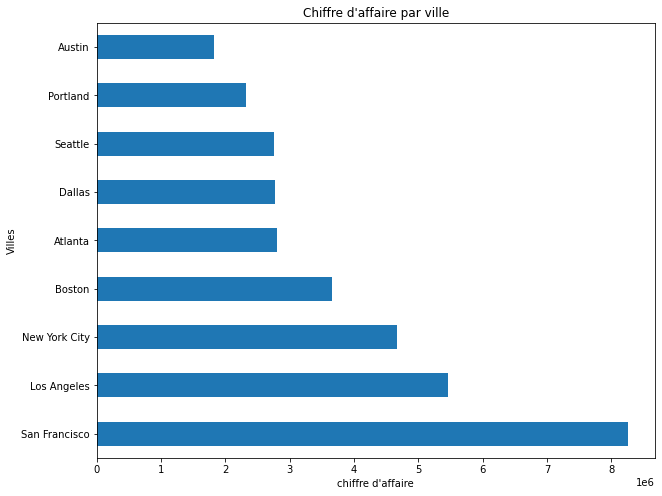

In [71]:
df_clean.groupby('ville')['chiffre_daffaire'].sum().sort_values(ascending=False).plot.barh(figsize=(10,8))
plt.ylabel("Villes")
plt.xlabel("chiffre d'affaire")
plt.title("Chiffre d'affaire par ville")
plt.show()

A quelle heure devons-nous passer de la publicité pour augmenter nos ventes?

In [73]:
df_clean.index.hour

Int64Index([3, 3, 4, 5, 6, 6, 6, 6, 7, 7,
            ...
            2, 3, 3, 3, 4, 4, 4, 4, 5, 5],
           dtype='int64', name='Order Date', length=185950)

In [74]:
df_clean["time"]=df_clean.index.time
df_clean["heure"]=df_clean.index.hour

In [78]:
df_clean.iloc[0:3,5:]

,chiffre_daffaire,Month,ville,time,heure
Order Date,,,,,
2019-01-01 03:07:00,11.99,January,New York City,03:07:00,3
2019-01-01 03:40:00,11.95,January,San Francisco,03:40:00,3
2019-01-01 04:56:00,150.00,January,New York City,04:56:00,4


In [80]:
df_clean.groupby('heure')['chiffre_daffaire'].sum().sort_values(ascending=False)

heure
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: chiffre_daffaire, dtype: float64

In [81]:
ca_par_heure=pd.DataFrame(df_clean.groupby('heure')['chiffre_daffaire'].sum())

In [82]:
ca_par_heure.head()

,chiffre_daffaire
heure,
0,713721.27
1,460866.88
2,234851.44
3,145757.89
4,162661.01


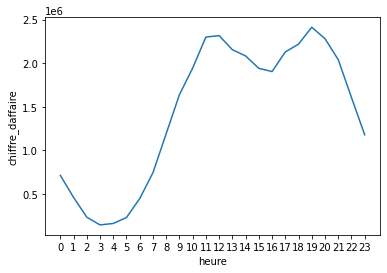

In [83]:
sns.lineplot(data=ca_par_heure['chiffre_daffaire'])
plt.xticks(ticks=range(0,24))
plt.show()

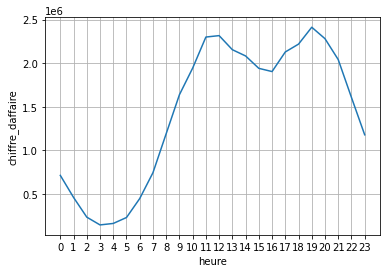

In [84]:
sns.lineplot(data=ca_par_heure['chiffre_daffaire'])
plt.xticks(ticks=range(0,24))
plt.grid()
plt.show()

On devrait afficher la publicité entre 10 et 11 et entre 18 et 19

## Quel sont les produits qui sont achetés ensemble

In [87]:
df_clean["Order ID"].duplicated()

Order Date
2019-01-01 03:07:00    False
2019-01-01 03:40:00    False
2019-01-01 04:56:00    False
2019-01-01 05:53:00    False
2019-01-01 06:03:00    False
                       ...  
2020-01-01 04:13:00    False
2020-01-01 04:21:00    False
2020-01-01 04:54:00    False
2020-01-01 05:13:00    False
2020-01-01 05:13:00     True
Name: Order ID, Length: 185950, dtype: bool

In [88]:
df_clean[df_clean["Order ID"].duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,chiffre_daffaire,Month,ville,time,heure
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",11.99,January,New York City,07:29:00,7
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",600.00,January,Atlanta,11:25:00,11
2019-01-01 12:02:00,148450,Lightning Charging Cable,1,14.95,"761 Lakeview St, Dallas, TX 75001",14.95,January,Dallas,12:02:00,12
2019-01-01 12:51:00,144679,Google Phone,1,600.00,"984 Lakeview St, San Francisco, CA 94016",600.00,January,San Francisco,12:51:00,12
2019-01-01 12:57:00,147451,Google Phone,1,600.00,"229 Elm St, New York City, NY 10001",600.00,January,New York City,12:57:00,12
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 20:51:00,301832,AAA Batteries (4-pack),1,2.99,"774 Washington St, San Francisco, CA 94016",2.99,December,San Francisco,20:51:00,20
2019-12-31 22:04:00,311036,AAA Batteries (4-pack),3,2.99,"138 Lincoln St, Los Angeles, CA 90001",8.97,December,Los Angeles,22:04:00,22
2020-01-01 00:10:00,311386,iPhone,1,700.00,"730 Pine St, San Francisco, CA 94016",700.00,January,San Francisco,00:10:00,0


In [89]:
df_clean[df_clean["Order ID"].duplicated(keep=False)]#keep=False  permet d'afficher aussi les doublons

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,chiffre_daffaire,Month,ville,time,heure
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",700.00,January,New York City,07:29:00,7
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",11.99,January,New York City,07:29:00,7
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",11.95,January,Atlanta,11:25:00,11
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",600.00,January,Atlanta,11:25:00,11
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",700.00,January,Dallas,12:02:00,12
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 00:10:00,311386,iPhone,1,700.00,"730 Pine St, San Francisco, CA 94016",700.00,January,San Francisco,00:10:00,0
2020-01-01 00:22:00,297817,iPhone,1,700.00,"519 13th St, New York City, NY 10001",700.00,January,New York City,00:22:00,0
2020-01-01 00:22:00,297817,Lightning Charging Cable,2,14.95,"519 13th St, New York City, NY 10001",29.90,January,New York City,00:22:00,0


In [96]:
df_m=df_clean[df_clean["Order ID"].duplicated(keep=False)].copy()
df_m

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,chiffre_daffaire,Month,ville,time,heure
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",700.00,January,New York City,07:29:00,7
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",11.99,January,New York City,07:29:00,7
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",11.95,January,Atlanta,11:25:00,11
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",600.00,January,Atlanta,11:25:00,11
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",700.00,January,Dallas,12:02:00,12
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 00:10:00,311386,iPhone,1,700.00,"730 Pine St, San Francisco, CA 94016",700.00,January,San Francisco,00:10:00,0
2020-01-01 00:22:00,297817,iPhone,1,700.00,"519 13th St, New York City, NY 10001",700.00,January,New York City,00:22:00,0
2020-01-01 00:22:00,297817,Lightning Charging Cable,2,14.95,"519 13th St, New York City, NY 10001",29.90,January,New York City,00:22:00,0


In [106]:
def products_par_order_id(p:list):
  return ";".join(p)

In [99]:
df_m.groupby('Order ID')['Product'].groups

{'141275': [2019-01-07 16:06:00, 2019-01-07 16:06:00], '141290': [2019-01-02 08:25:00, 2019-01-02 08:25:00], '141365': [2019-01-10 11:19:00, 2019-01-10 11:19:00], '141384': [2019-01-03 00:14:00, 2019-01-03 00:14:00], '141450': [2019-01-12 11:16:00, 2019-01-12 11:16:00], '141457': [2019-01-09 22:11:00, 2019-01-09 22:11:00], '141478': [2019-01-26 13:32:00, 2019-01-26 13:32:00], '141550': [2019-01-31 10:58:00, 2019-01-31 10:58:00, 2019-01-31 10:58:00], '141587': [2019-01-29 15:14:00, 2019-01-29 15:14:00], '141645': [2019-01-30 15:30:00, 2019-01-30 15:30:00], '141738': [2019-01-14 20:53:00, 2019-01-14 20:53:00], '141782': [2019-01-11 21:13:00, 2019-01-11 21:13:00], '141789': [2019-01-01 20:13:00, 2019-01-01 20:13:00], '141795': [2019-01-19 20:31:00, 2019-01-19 20:31:00], '141809': [2019-01-08 15:38:00, 2019-01-08 15:38:00], '141843': [2019-01-10 09:59:00, 2019-01-10 09:59:00], '141900': [2019-01-18 09:53:00, 2019-01-18 09:53:00, 2019-01-18 09:53:00], '141901': [2019-01-26 22:12:00, 2019-01

In [100]:
df_m.groupby('Order ID').groups

{'141275': [2019-01-07 16:06:00, 2019-01-07 16:06:00], '141290': [2019-01-02 08:25:00, 2019-01-02 08:25:00], '141365': [2019-01-10 11:19:00, 2019-01-10 11:19:00], '141384': [2019-01-03 00:14:00, 2019-01-03 00:14:00], '141450': [2019-01-12 11:16:00, 2019-01-12 11:16:00], '141457': [2019-01-09 22:11:00, 2019-01-09 22:11:00], '141478': [2019-01-26 13:32:00, 2019-01-26 13:32:00], '141550': [2019-01-31 10:58:00, 2019-01-31 10:58:00, 2019-01-31 10:58:00], '141587': [2019-01-29 15:14:00, 2019-01-29 15:14:00], '141645': [2019-01-30 15:30:00, 2019-01-30 15:30:00], '141738': [2019-01-14 20:53:00, 2019-01-14 20:53:00], '141782': [2019-01-11 21:13:00, 2019-01-11 21:13:00], '141789': [2019-01-01 20:13:00, 2019-01-01 20:13:00], '141795': [2019-01-19 20:31:00, 2019-01-19 20:31:00], '141809': [2019-01-08 15:38:00, 2019-01-08 15:38:00], '141843': [2019-01-10 09:59:00, 2019-01-10 09:59:00], '141900': [2019-01-18 09:53:00, 2019-01-18 09:53:00, 2019-01-18 09:53:00], '141901': [2019-01-26 22:12:00, 2019-01

In [101]:
df_m.groupby('Order ID')['Product'].groups

{'141275': [2019-01-07 16:06:00, 2019-01-07 16:06:00], '141290': [2019-01-02 08:25:00, 2019-01-02 08:25:00], '141365': [2019-01-10 11:19:00, 2019-01-10 11:19:00], '141384': [2019-01-03 00:14:00, 2019-01-03 00:14:00], '141450': [2019-01-12 11:16:00, 2019-01-12 11:16:00], '141457': [2019-01-09 22:11:00, 2019-01-09 22:11:00], '141478': [2019-01-26 13:32:00, 2019-01-26 13:32:00], '141550': [2019-01-31 10:58:00, 2019-01-31 10:58:00, 2019-01-31 10:58:00], '141587': [2019-01-29 15:14:00, 2019-01-29 15:14:00], '141645': [2019-01-30 15:30:00, 2019-01-30 15:30:00], '141738': [2019-01-14 20:53:00, 2019-01-14 20:53:00], '141782': [2019-01-11 21:13:00, 2019-01-11 21:13:00], '141789': [2019-01-01 20:13:00, 2019-01-01 20:13:00], '141795': [2019-01-19 20:31:00, 2019-01-19 20:31:00], '141809': [2019-01-08 15:38:00, 2019-01-08 15:38:00], '141843': [2019-01-10 09:59:00, 2019-01-10 09:59:00], '141900': [2019-01-18 09:53:00, 2019-01-18 09:53:00, 2019-01-18 09:53:00], '141901': [2019-01-26 22:12:00, 2019-01

In [107]:
df_m.groupby('Order ID')['Product'].apply(products_par_order_id)

Order ID
141275              USB-C Charging Cable;Wired Headphones
141290     Apple Airpods Headphones;AA Batteries (4-pack)
141365                   Wired Headphones;Vareebadd Phone
141384                  Google Phone;USB-C Charging Cable
141450            Google Phone;Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop;Wired Headphones
319556                      Wired Headphones;Google Phone
319584                            iPhone;Wired Headphones
319596                    iPhone;Lightning Charging Cable
319631    Lightning Charging Cable;34in Ultrawide Monitor
Name: Product, Length: 7136, dtype: object

In [108]:
ensemble=df_m.groupby('Order ID')['Product'].apply(products_par_order_id)

In [109]:
from itertools import combinations
from collections import Counter

In [110]:
combinations(['a','c','b','e'],2)

In [111]:
list(combinations(['a','c','b','e'],2))

[('a', 'c'), ('a', 'b'), ('a', 'e'), ('c', 'b'), ('c', 'e'), ('b', 'e')]

In [113]:
list(combinations(['a','c','b','e'],3))

[('a', 'c', 'b'), ('a', 'c', 'e'), ('a', 'b', 'e'), ('c', 'b', 'e')]

In [114]:
Counter(combinations(['a','c','b','e'],2))

Counter({('a', 'b'): 1,
         ('a', 'c'): 1,
         ('a', 'e'): 1,
         ('b', 'e'): 1,
         ('c', 'b'): 1,
         ('c', 'e'): 1})

In [116]:
for i,j in combinations(['a','c','b'],2):
  print(i,j)

a c
a b
c b


In [118]:
ensemble.to_list()

['USB-C Charging Cable;Wired Headphones',
 'Apple Airpods Headphones;AA Batteries (4-pack)',
 'Wired Headphones;Vareebadd Phone',
 'Google Phone;USB-C Charging Cable',
 'Google Phone;Bose SoundSport Headphones',
 'iPhone;Apple Airpods Headphones',
 'Google Phone;Apple Airpods Headphones',
 'iPhone;Wired Headphones;Apple Airpods Headphones',
 'USB-C Charging Cable;Apple Airpods Headphones',
 'Lightning Charging Cable;Wired Headphones',
 'Lightning Charging Cable;iPhone',
 'Bose SoundSport Headphones;27in FHD Monitor',
 'Google Phone;USB-C Charging Cable',
 'Wired Headphones;iPhone',
 'Google Phone;USB-C Charging Cable',
 'AAA Batteries (4-pack);AA Batteries (4-pack)',
 'USB-C Charging Cable;Vareebadd Phone;Wired Headphones',
 'USB-C Charging Cable;Google Phone',
 'Wired Headphones;Vareebadd Phone',
 '34in Ultrawide Monitor;Lightning Charging Cable',
 'USB-C Charging Cable;Wired Headphones',
 'Lightning Charging Cable;Bose SoundSport Headphones',
 'Google Phone;Wired Headphones',
 'Wired

In [121]:
count=Counter()
for achat in ensemble.tolist():
  products=achat.split(';')
  print(products)
  count.update(combinations(products,2))
  break

['USB-C Charging Cable', 'Wired Headphones']


In [122]:
for achat in ensemble.tolist():
  products=achat.split(';')
  print(products)
  count.update(combinations(products,2))
  

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
['Lightning Charging Cable', 'iPhone']
['Lightning Charging Cable', 'iPhone']
['Google Phone', 'Wired Headphones']
['USB-C Charging Cable', 'Google Phone']
['Wired Headphones', 'Lightning Charging Cable', 'iPhone']
['Flatscreen TV', 'AAA Batteries (4-pack)']
['Wired Headphones', 'Bose SoundSport Headphones']
['iPhone', 'Lightning Charging Cable']
['iPhone', 'Wired Headphones']
['USB-C Charging Cable', 'iPhone', 'Lightning Charging Cable', 'Wired Headphones']
['Macbook Pro Laptop', 'Bose SoundSport Headphones']
['USB-C Charging Cable', 'Google Phone', 'Wired Headphones']
['Lightning Charging Cable', 'iPhone']
['AAA Batteries (4-pack)', 'AA Batteries (4-pack)']
['iPhone', 'ThinkPad Laptop']
['Bose SoundSport Headphones', 'Google Phone']
['Bose SoundSport Headphones', 'Vareebadd Phone']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'Bose SoundSport Headphones']
['USB-C Charging Cable', 'Wired Headpho

In [123]:
count

Counter({('20in Monitor', '20in Monitor'): 3,
         ('20in Monitor', '27in 4K Gaming Monitor'): 1,
         ('20in Monitor', '27in FHD Monitor'): 1,
         ('20in Monitor', '34in Ultrawide Monitor'): 1,
         ('20in Monitor', 'AA Batteries (4-pack)'): 10,
         ('20in Monitor', 'AAA Batteries (4-pack)'): 7,
         ('20in Monitor', 'Apple Airpods Headphones'): 6,
         ('20in Monitor', 'Bose SoundSport Headphones'): 6,
         ('20in Monitor', 'Flatscreen TV'): 1,
         ('20in Monitor', 'Google Phone'): 2,
         ('20in Monitor', 'LG Washing Machine'): 2,
         ('20in Monitor', 'Lightning Charging Cable'): 14,
         ('20in Monitor', 'Macbook Pro Laptop'): 2,
         ('20in Monitor', 'ThinkPad Laptop'): 1,
         ('20in Monitor', 'USB-C Charging Cable'): 10,
         ('20in Monitor', 'Wired Headphones'): 15,
         ('20in Monitor', 'iPhone'): 1,
         ('27in 4K Gaming Monitor', '20in Monitor'): 1,
         ('27in 4K Gaming Monitor', '27in 4K Gaming Mon

In [124]:
count.most_common(1)

[(('USB-C Charging Cable', 'Google Phone'), 532)]

In [125]:
count.most_common(5)

[(('USB-C Charging Cable', 'Google Phone'), 532),
 (('Lightning Charging Cable', 'iPhone'), 514),
 (('iPhone', 'Lightning Charging Cable'), 501),
 (('Google Phone', 'USB-C Charging Cable'), 467),
 (('Wired Headphones', 'iPhone'), 234)]

In [126]:
for ensemble, c in count.most_common(10):
  print(ensemble,c)

('USB-C Charging Cable', 'Google Phone') 532
('Lightning Charging Cable', 'iPhone') 514
('iPhone', 'Lightning Charging Cable') 501
('Google Phone', 'USB-C Charging Cable') 467
('Wired Headphones', 'iPhone') 234
('iPhone', 'Wired Headphones') 228
('Google Phone', 'Wired Headphones') 214
('Wired Headphones', 'Google Phone') 209
('iPhone', 'Apple Airpods Headphones') 198
('USB-C Charging Cable', 'Vareebadd Phone') 185


In [127]:
df_clean.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [ ]:
https://colab.research.google.com/github/kevindegila/data-analyst/

https://www.youtube.com/watch?v=bSnDlvJWed8&list=PL049bGjkT7dLJo748aOvXnUg0YtR1tacv&index=30